In [1]:
import numpy as np
from skimage.io import imread
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.callbacks import History

/home/ahsanyleg/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# read all the images first
x_train = []
for i in range(1, 4): # changed to 3 classes
    base_dir = f'./cancer_data/stage_{i}_png/'
    files = os.listdir(base_dir)
    for file in tqdm(files):
        img = imread(base_dir+file)
        x_train.append(img)
x_train = np.array(x_train)
x_train.shape

100%|██████████| 250/250 [00:02<00:00, 100.23it/s]


(750, 512, 512)

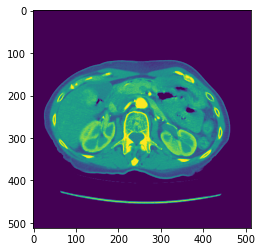

In [3]:
plt.imshow(x_train[0])

In [4]:
NUM = 250
CLASSES = 3 #4
y_train = []
class_label = 0
for i in range(NUM*CLASSES):
    if i > 0 and i %  NUM == 0:
        class_label += 1
    y_train.append(class_label)
y_train = np.array(y_train)

In [5]:
# shuffle training data
shuffler = np.random.permutation(NUM*CLASSES)
x_train = x_train[shuffler]
y_train = y_train[shuffler]

In [6]:
# make training and testing data
NUM_TRAIN =int(NUM*CLASSES*0.85)
x_test = x_train[NUM_TRAIN:]
y_test = y_train[NUM_TRAIN:]
x_train = x_train[:NUM_TRAIN]
y_train = y_train[:NUM_TRAIN]

In [7]:
x_train[0].shape

(512, 512)

In [8]:
# flatten 
x_train_flattened = x_train.reshape(len(x_train), x_train[0].shape[0] * x_train[0].shape[1])
x_test_flattened = x_test.reshape(len(x_test), x_test[0].shape[0] * x_test[0].shape[1])

In [9]:
history = History()
model = keras.Sequential([
    keras.layers.Dense(2000, input_shape=(512*512,), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10, callbacks=[history])

Epoch 1/10
20/20 [==============================] - 52s 3s/step - loss: 6.2718 - accuracy: 0.3281
Epoch 2/10
20/20 [==============================] - 43s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 3/10
20/20 [==============================] - 48s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 4/10
20/20 [==============================] - 38s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 5/10
20/20 [==============================] - 38s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 6/10
20/20 [==============================] - 48s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 7/10
20/20 [==============================] - 38s 2s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 8/10
20/20 [==============================] - 73s 4s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 9/10
20/20 [==============================] - 63s 3s/step - loss: 6.1586 - accuracy: 0.3281
Epoch 10/10
20/20 [==============================] - 57s 3s/step - loss: 6.1586 - accuracy: 0.3281


In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_wanted = x_train.reshape(len(x_train), 512, 512, 1)
cnn.fit(x_wanted, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 147s 7s/step - loss: 385.2960 - accuracy: 0.7928
Epoch 2/10
20/20 [==============================] - 153s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 161s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 165s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
 9/20 [============>.................] - ETA: 1:24 - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: 

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_wanted = x_train.reshape(len(x_train), 512, 512, 1)
cnn.fit(x_wanted, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 240s 12s/step - loss: 818.1052 - accuracy: 0.8148
Epoch 2/10
20/20 [==============================] - 243s 12s/step - loss: 0.2749 - accuracy: 0.9922
Epoch 3/10
20/20 [==============================] - 242s 12s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
 4/20 [=====>........................] - ETA: 2:34 - loss: 0.0000e+00 - accuracy: 1.0000